# Summmary

This notebook will show some very basic computer vision capability.  
Creating a multi-class classifier to predict correct class from the Fashion MNIST dataset.  
The purpose is to demonstrate the ability to learn from images by beating a naive baseline.

Each sample image is a black and white image 28x28, for a total of 784 pixels.  
This notebook will demonstrate the use of Convolutional Neural Networks (CNN) for image classification.  
CNN's on color images are treated just a little different, each image has a color channel associated with it for Red, Green, Blue.  
Classification tasks on color images will add/remove additional channels in the hidden layers of a neural network.

# Data

The fashion MNIST dataset contains 60,000 training samples.
Output classes are defined as:
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(f"x train: {x_train.shape}")
print(f"y train: {y_train.shape}")
print(f"x test: {x_test.shape}")
print(f"y test: {y_test.shape}")

x train: (60000, 28, 28)
y train: (60000,)
x test: (10000, 28, 28)
y test: (10000,)


# Baseline

In a multi-class classification setting a reasonable naive baseline is to predict the majority class for all records.  
Other baselines could be random guessing, or guessing based on true class distribution.
Any of these metrics is likely perform very poorly.  
Use micro-average f1 score and consider each of these possible baselines.

Micro average f1 computes true positive, false positive, and false negative globally across all classes.  
This gives a metric for how the classifier performs in a globabl sense.

In [5]:
unique, counts = np.unique(y_train, return_counts=True)

In [6]:
# Combine into a dictionary or display
counts_dict = dict(zip(unique, counts))

In [7]:
counts_dict

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

Training data contains an exactly uniform distribution of output classes.  
Therefore any class will suffice as the majority class.  
Guessing based on distribution will be equivalent to random guessing.  

In [8]:
baseline_majority = f1_score(y_train, np.ones(y_train.shape[0]), average="micro") # Guess ones for all training samples

In [9]:
baseline_random = f1_score(y_train,
                           np.random.randint(0, 10, size=y_train.shape[0]),
                           average="micro")

In [10]:
print(f"Baseline using majority class: {baseline_majority}")
print(f"Baseline using random guessing: {baseline_majority}")

Baseline using majority class: 0.1
Baseline using random guessing: 0.1


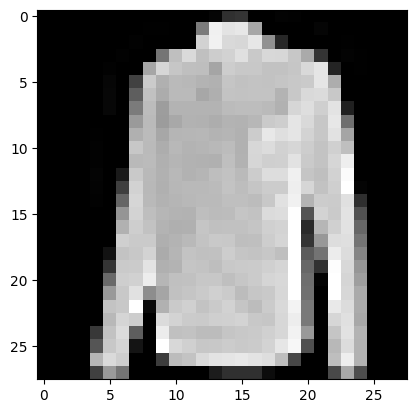

In [11]:
# Take a look at a raw image.
plt.imshow(x_train[np.random.randint(0, len(y_train))], cmap='gray', vmin=0, vmax=255)

# Preprocessing

The only pre-processing necessary is to normalize the images.  
This is pretty simple because pixel values are between 0-255.  
Dividing each pixel by 255 scales each value to between 0-1.

Using f1 as a scoring metric needs one-hot encoded outputs

In [12]:
# Normalize image vectors (could have done this sooner)
x_train = x_train/255.00
x_test = x_test/255.00

In [13]:
# Convert training and test labels to one hot matrices
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

# Model

Use a tf.keras.Sequential model to demonstrate a CNN.

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=[tf.keras.metrics.F1Score(average="micro")],
)

In [16]:
# loss is still decreasing at 5 epochs, go to 10
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - f1_score: 0.8104 - loss: 0.5215
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - f1_score: 0.9086 - loss: 0.2476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - f1_score: 0.9262 - loss: 0.1986
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - f1_score: 0.9395 - loss: 0.1638
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - f1_score: 0.9495 - loss: 0.1382
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - f1_score: 0.9587 - loss: 0.1083
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - f1_score: 0.9661 - loss: 0.0906
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - f1_score: 0.9731 - loss: 0.0715
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - f1_score: 0.9791 - loss: 0.0571
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - f1_score: 0.9820 - loss: 0.0496


# Evaluation

No need to further evaluate the classifier on the training set, the f1 score at the final epoch is the score.

Evaluate on test set.

In [17]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.9166 - loss: 0.3628


[0.35779666900634766, 0.9169999361038208]

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,690,720 (10.26 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,793,814 (6.84 MB)

# Summary

This sample CNN on the relatively trivial MNIST dataset does a great job at predicting the correct output classes.  
With an F1 Score of 0.9166 on the test set, it is approaching a perfect classifier.

# TensorFlow

There are a few things I love about TensorFlow as compared to PyTorch and they are all demonstrated in this notebook.

- a handy model.evaluate() method that allows one to easily evaluate a fitted model on another dataset.
- The model.summary() method shows some of the most important things to be aware of with Neural Networks:
    - The output shape of each layer in the network
    - The number of parameters in each layer
    - The total number of trainable parameters.

The tf.keras.sequential class also makes building complex networks relatively quick and easy and should be sufficient for most professional organizations and/or well known problems.